In [1]:
import json
import pandas
import numpy

# Aufgabe 2-1 Implementierung der Hauptkomponentenanalyse
Wir beginnen zunächst mit einem schon bekannten Datensatz, Boston Housing aus Übung


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM ', 'ZN ', 'INDUS ', 'CHAS ', 'NOX ', 'RM ', 'AGE ', 'DIS ', 'RAD ', 'TAX ', 'PTRATIO ', 'B', 'LSTAT ',
        'TGT ']
rawData = pandas.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)
rawData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


1.1. Zur praktischen Berechnung der Hauptkomponentenanalyse gehen Sie folgt vor:
1. Gegeben eine Menge von n d-dimensionalen Datenpunkten xi, berechnen Sie zuerst
deren Mittelwert µx = n1 Pn i=1 xi für jedes einzelne Merkmal und ziehen ihn von allen
Datenpunkten ab (Zentrierung).


In [3]:
boston = rawData - rawData.mean()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,1.467194
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,-0.932806
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,12.167194
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,10.867194
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,13.667194


2. Normieren Sie dann alle Merkmale so, dass sie eine Varianz von 1 haben. Dieser Schritt ist optional, aber meist vorteilhaft.

In [4]:
boston = boston / boston.std()
print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


3. Kopieren Sie alle xi als Reihen in eine n × d-Matrix X, die sog. Daten- oder Designmatrix.
  * Ist bereits in Matrix
4. Zur Lösung des Eigenwertproblens berechnen Sie die Singulärwertzerlegung von X
(z.B. mit numpy.linalg.svd()):
X = UDV >
Wer nicht weiß, was eine Singuärwertzerlegung ist oder macht, der lese bitte in den
entsprechenden Wikipedia-Einträgen nach. Im Prinzip könnte man auch direkt die Eigenwerte der Kovarianzmatrix (s. Folie 12) berechnen (z.B. mit numpy.linalg.eig()),
diese Methode ist aber meist aufwändiger und numerisch weniger stabil.


In [5]:
numpy.linalg.svd(boston.values)

(array([[-0.03626862,  0.01705933, -0.0128606 , ..., -0.02332528,
         -0.02293993, -0.02777876],
        [-0.02386318, -0.00591625, -0.03697388, ..., -0.03190711,
         -0.03169695, -0.03252226],
        [-0.04129378,  0.0316376 , -0.00344589, ..., -0.00789818,
         -0.00629088,  0.00170864],
        ...,
        [-0.00639748,  0.02849246, -0.03573161, ...,  0.97507487,
         -0.02372908, -0.02201894],
        [-0.00459264,  0.0186918 , -0.03955001, ..., -0.02369927,
          0.97726437, -0.02197839],
        [ 0.00339231, -0.01931347, -0.06032707, ..., -0.02191509,
         -0.02193962,  0.97144043]]),
 array([57.49543232, 28.8619752 , 26.09976038, 21.15898471, 20.72930816,
        18.25665469, 16.44331032, 14.26722377, 11.83292482, 11.28671816,
        10.36624696,  9.61294373,  8.22647535,  5.51950744]),
 array([[ 2.42284451e-01, -2.45435005e-01,  3.31859746e-01,
         -5.02713285e-03,  3.25193880e-01, -2.02816554e-01,
          2.96976574e-01, -2.98169809e-01,  3

5. Die ersten r Basisvektoren qi (d.h die ersten r Hauptkomponenten) sind die ersten r
Spalten der orthogonalen d × d-Matrix V .
6. Die Projektionen ai der Daten xi auf die ersten r Basisvektoren qj (d.h die neuen
Variablenwerte im neuen Koordinatensystem) sind die die ersten r Spalten der n × dMatrix UD.
7. Die Standardabweichungen entlang der Hauptkomponenten qi sind die Diagonalelemente der Diagonalmatrix D geteilt durch n − 1.

Aufgaben:
* Implementieren Sie ein Python-Modul, das eine Funktion zur Hauptkomponentenanalyse
nach obigem Schema zur Verfügung stellt.


In [6]:
def hauptkomponentenanalyse(data):
    data = data - data.mean()
    data = data / data.std()
    return numpy.linalg.svd(data.values, full_matrices = False)
 

* Testen Sie Ihr Modul innerhalb eines IPython-Notebooks am Datensatz Boston Housing.


In [7]:
print("RawData " + str(rawData.shape) + "\n")
[u, d, v] = hauptkomponentenanalyse(rawData)
print("U " + str(u.shape) + " = " + str(u) + "\n")
print("D " + str(d.shape) + " = " + str(d) + "\n")
print("V " + str(v.shape) + " = " + str(v) + "\n")

RawData (506, 14)

U (506, 14) = [[-0.03626862  0.01705933 -0.0128606  ... -0.01139303 -0.0600732
   0.04487465]
 [-0.02386318 -0.00591625 -0.03697388 ...  0.0611799  -0.01372942
  -0.02047375]
 [-0.04129378  0.0316376  -0.00344589 ...  0.04327566  0.04335717
   0.00928647]
 ...
 [-0.00639748  0.02849246 -0.03573161 ... -0.03271133 -0.01803102
   0.00041901]
 [-0.00459264  0.0186918  -0.03955001 ... -0.03112103 -0.01708565
  -0.00167926]
 [ 0.00339231 -0.01931347 -0.06032707 ... -0.04450788 -0.06182849
  -0.02445481]]

D (14,) = [57.49543232 28.8619752  26.09976038 21.15898471 20.72930816 18.25665469
 16.44331032 14.26722377 11.83292482 11.28671816 10.36624696  9.61294373
  8.22647535  5.51950744]

V (14, 14) = [[ 2.42284451e-01 -2.45435005e-01  3.31859746e-01 -5.02713285e-03
   3.25193880e-01 -2.02816554e-01  2.96976574e-01 -2.98169809e-01
   3.03412754e-01  3.24033052e-01  2.07679535e-01 -1.96638358e-01
   3.11397955e-01 -2.66636396e-01]
 [-6.58731079e-02 -1.48002653e-01  1.27075668e

* ...Stellen Sie Ihre Ergebnisse in einer Tabelle
  * mit den Eigenwerten der Kovarianzmatrix (Achtung: die Diagonalelemente von D müssen dafür quadriert und durch n − 1 geteilt werden. Warum?)
    * Diagonalelemente sind die Wurzeln der Eigenwerte
  * dem Anteil der zugehörigen Hauptkomponente an an der Gesamtvarianz (“erklärte Varianz”) 
  * und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil die ersten n Komponenten zusammen erklären.
* Wieviele Dimensionen können Sie weglassen, wenn Sie 
  * 10% => alle bis auf 2
  * 5% => alle bis auf 2
  * 1% = alle bis auf 4
* ...Fehler bei der Dimensionsreduktion zulassen?


In [8]:
print(d)

[57.49543232 28.8619752  26.09976038 21.15898471 20.72930816 18.25665469
 16.44331032 14.26722377 11.83292482 11.28671816 10.36624696  9.61294373
  8.22647535  5.51950744]


In [9]:
# Eigenwerte der Kovarianzmatrix  
eigenwerteKovarianz = list(map(lambda x: (x * x) / (len(u) - 1) , d))
eigenwerteKovarianz

[6.545989578651782,
 1.6495319057377724,
 1.3489059240249288,
 0.8865398691512935,
 0.8508994394708579,
 0.660010773418997,
 0.5354108004519806,
 0.4030765822852039,
 0.27726358378553106,
 0.2522574393793448,
 0.2127902495206947,
 0.18298749936287972,
 0.13400969655129022,
 0.06032665820743341]

In [10]:
# Anteil an Gesamtvarianz
part = list(map(lambda x: x / sum(eigenwerteKovarianz) , eigenwerteKovarianz))
part

[0.46757068418941317,
 0.11782370755269808,
 0.0963504231446378,
 0.06332427636794956,
 0.06077853139077559,
 0.04714362667278552,
 0.038243628603712915,
 0.028791184448943144,
 0.01980454169896651,
 0.018018388527096064,
 0.015199303537192484,
 0.013070535668777129,
 0.00957212118223502,
 0.004309047014816674]

In [11]:
# Kumulative Varianz
partKumulativ = part.copy()
for i in range(1, len(part)):
    partKumulativ[i] = partKumulativ[i] + partKumulativ[i - 1]
partKumulativ

[0.46757068418941317,
 0.5853943917421113,
 0.6817448148867491,
 0.7450690912546987,
 0.8058476226454743,
 0.8529912493182598,
 0.8912348779219726,
 0.9200260623709158,
 0.9398306040698823,
 0.9578489925969783,
 0.9730482961341708,
 0.9861188318029479,
 0.995690952985183,
 0.9999999999999997]

* Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den ursprünglichen Variablen. Interpretieren Sie Ihr Ergebnis.


In [12]:
v[:, [0, 1, 2]]

array([[ 0.24228445, -0.24543501,  0.33185975],
       [-0.06587311, -0.14800265,  0.12707567],
       [ 0.39507742,  0.39454571, -0.06608191],
       [-0.10036621, -0.34295842,  0.00962694],
       [ 0.00495766,  0.114495  , -0.02258369],
       [-0.22462703, -0.33574694, -0.08082495],
       [ 0.77708337, -0.27417836, -0.34027384],
       [-0.1574014 ,  0.38031404, -0.17174578],
       [ 0.2542118 ,  0.38289948,  0.62704826],
       [-0.07138461,  0.24557967, -0.25482703],
       [-0.07106878, -0.12770907,  0.27379761],
       [ 0.06327612, -0.2211221 ,  0.34840828],
       [ 0.09703231, -0.13237583,  0.08371685],
       [ 0.05911418, -0.09629681, -0.23547288]])

In [13]:
# np.dot(self.U[:, :n], np.diag(self.D)[:n,:n])
projection = numpy.dot(u, numpy.diag(d))[:, [0, 1, 2]]

pandas.DataFrame(projection).head()

,0,1,2
0,-2.085280,0.492366,-0.335659
1,-1.372024,-0.170755,-0.965009
2,-2.374204,0.913124,-0.089937
3,-2.834974,0.194677,0.060485
4,-2.770174,0.432871,0.063979


In [14]:
# Korrelationskoeffizenten mit 1. Hauptkomponente
kk1 = list(map(lambda i: numpy.corrcoef(projection[:, 0], boston.iloc[:,i])[0][1], range(0, 14)))


In [15]:
# Korrelationskoeffizenten mit 2. Hauptkomponente
kk2 = list(map(lambda i: numpy.corrcoef(projection[:, 1], boston.iloc[:,i])[0][1], range(0, 14)))


In [16]:
# Korrelationskoeffizenten mit 3. Hauptkomponente
kk3 = list(map(lambda i: numpy.corrcoef(projection[:, 2], boston.iloc[:,i])[0][1], range(0, 14)))

* Stellen Sie die ersten beiden der neuen Variablen als Scatterplot dar (am besten in
Pandas-Dataframe importieren). Plotten Sie dabei alle Datenpunkte mit einem Hauspreis
oberhalb des Medians aller Hauspreise in einer anderen Farbe als die Datenpunkte unterhalb.
Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

In [17]:
kk = list(map(lambda i: [kk1[i], kk2[i], kk3[i]], range(0, 14)))
pandas.DataFrame(kk)

,0,1,2
0,0.619888,-0.084604,0.458852
1,-0.627949,-0.190086,0.458235
2,0.849068,0.163208,-0.076749
3,-0.012862,0.527439,-0.145533
4,0.832013,0.326578,-0.053978
5,-0.518909,0.557411,0.410454
6,0.759818,0.334318,-0.233241
7,-0.762871,-0.461271,0.182423
8,0.776286,0.040007,0.486068
9,0.829043,0.011368,0.398638


In [18]:
p1u2 = pandas.DataFrame(projection).iloc[:,[0, 1]]
p1u2.head()

,0,1
0,-2.085280,0.492366
1,-1.372024,-0.170755
2,-2.374204,0.913124
3,-2.834974,0.194677
4,-2.770174,0.432871


In [19]:
medianGgt = boston.median()[-1]
medianGgt

-0.144915868239391

In [20]:
projection.shape

(506, 3)

In [21]:
v.shape

(14, 14)

In [22]:
u.shape

(506, 14)

In [23]:
projection.shape

(506, 3)

In [24]:
points = p1u2 #numpy.dot(projection, kk1u2)
points.head()

,0,1
0,-2.085280,0.492366
1,-1.372024,-0.170755
2,-2.374204,0.913124
3,-2.834974,0.194677
4,-2.770174,0.432871


In [25]:
tgtCol = boston.iloc[:,-1]
md = tgtCol.median()

def getColor(v):
    if v > md:
        return '#FF7700' 
    else:
        return '#0000FF'

colors = list(map(lambda x: getColor(x), tgtCol))
colors

['#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#FF7700',
 '#FF7700',
 '#FF7700',
 '#F

<class 'pandas.core.frame.DataFrame'>


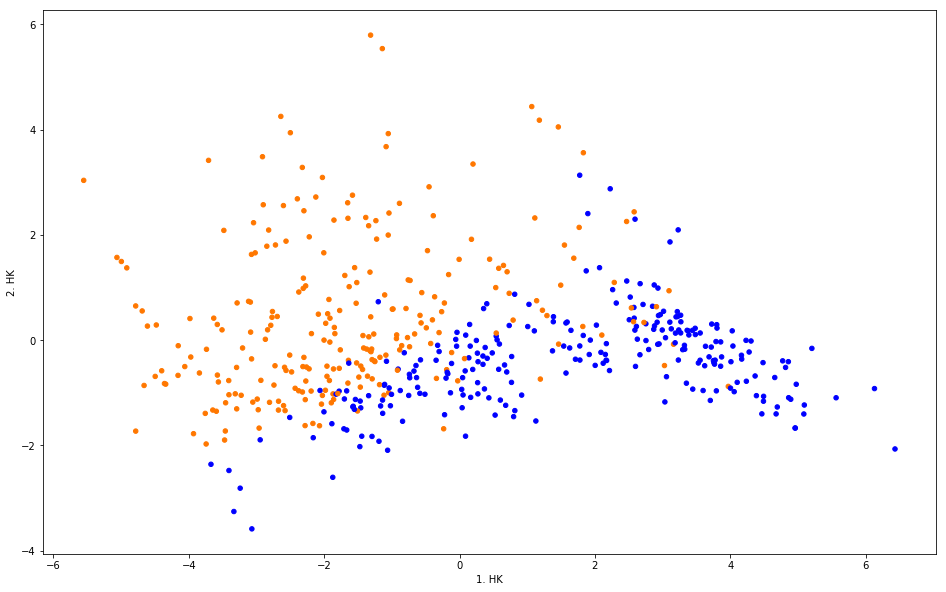

In [26]:
print(type(points))
%matplotlib inline
pointsDf = pandas.DataFrame(points.values, columns=["1. HK", "2. HK"])
pointsDf.plot.scatter(0, 1, c=colors, figsize=(16, 10));

# Aufgabe 2

Die Hauptkomponentenanalyse lässt sich auch auf Bilder anwenden, indem man die Bildzeilen in einem einzigen Vektor aneinander hängt (Stacking). Die zugehörigen Richtungen
extremaler Varianz heißen Eigengesichter. Sie eignen sich nicht nur zur Datenkompression, sondern auch zum Aufbau eines einfachen Gesichtserkennungssystems (s. M. Turk
and A. Pentland, “Eigenfaces for Recognition”, Journal of Cognitive Neuroscience, vol.
3, no. 1, pp. 71–86, 1991). Für die Funktion eines solchen Systems ist es wichtig, dass
die Gesichter zentriert und in derselben Größe abgebildet sind. Ein dafür geeigneter Datensatz ist “Labeled Faces in the Wild” der Universität von Massachusetts in Amherst
(http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz, 233MB) mit Bildern von 13.000
Personen des öffentlichen Lebens aus dem Internet, alle mit Namen gelabelt.
Aufgaben:


a. Laden Sie sich den oben angegebenen Datensatz herunter. Erstellen Sie ein PythonSkript, dass die Verzeichnisse des Datensatzes durchsucht und die Personen ermittelt,
für die mindestens 70 Bilder existieren. Die dafür geeigneten Funktionen finden sich im
Standardmodul os bzw. os.path.

In [30]:
import os
names = list(filter(lambda name: len(os.listdir('lfw_funneled/' + name)) >= 70, os.listdir('lfw_funneled')))
names

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'lfw_funneled'

b. Erstellen Sie ein Python-Skript, das alle Bilder bis auf eines pro Person (diese werden
später zum Testen des Klassifikators gebraucht) dieser am häufigsten abgebildeten Personen
lädt, diese in Vektoren stackt und dann in einer gemeinsamen Designmatrix ablegt. Zum
Laden der Bilder in Numpy-Arrays verwenden Sie am einfachsten das Modul scikit-image.
Schneiden Sie zunächst einen einheitlichen zentralen Ausschnitt aus, der nur Augen und
Mund enthält. Skalieren Sie die Bilder auf die Größe 32 × 32. Achten Sie darauf, vorher die
Farbbilder in Grauwerte umzuwandeln (z.B. mit der Option as_grey = True) Legen Sie
zusätzlich einen Vektor an, in dem der Name der Person (d.h. der Ordnername) für jede
Zeile steht. Führen Sie die gleiche Art der Verarbeitung mit dem übrig gebliebenen Testbild
pro Person durch und speichern Sie diese getrennt ab.


In [ ]:
from skimage import io
for name in names:
    files = os.listdir('lfw_funneled/' + name)
    print(files[0])
    

    x = io.imread('lfw_funneled/' + name + '/' + files[0])
    x = x[75:175,75:175]
    io.imshow(x)


In [ ]:
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

c. Wenden Sie nun Ihre Hauptkomponentenanalyse aus Aufgabe 1 auf Ihre Designmatrix
(Achtung: kopieren Sie alle Trainingsbilder für alle Personen als Zeilen in eine gemeinsame
Designmatrix!) an. Stellen Sie die ersten 150 Eigenwerte in einem Diagramm und die ersten 12
Eigengesichter durch Umformung der gestackten Darstellung in das ursprüngliche Bildformat
dar. Interpretieren Sie das Ergebnis.


d. Von den Testbildern wird nun ebenfalls der Mittelwert der Trainingsdaten abgezogen (s.
Schritt 1 im Algorithmus). Projizieren Sie jedes der Trainings- und Testbilder auf die ersten
7 Eigengesichter, d.h. Sie erhalten so für jedes Trainings- und Testbild 7 Merkmale. Die
Gesichtserkennung geschieht nun dadurch, dass Sie den euklidischen Abstand des Testbildes
in diesem 7-dimensionalen Merkmalsraum zu allen Trainingsbildern berechnen. Die Person
des am nächsten liegenden Trainingsbildes (d.h. mit dem minimalen euklidischen Abstand) ist
dann (vermutlich) auch die korrekte Person für das Testbild (Nächster-Nachbar-Klassifikator).
Welche Bilder werden korrekt klassifiziert, welche Verwechslungen gibt es?